# Import relevant Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Reading the data


In [3]:
data= pd.read_csv(r'C:\Users\Admin\Downloads\1613779-Red_wine_.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [4]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


# Checking null values

In [7]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide     True
density                 False
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
data.isnull().sum().sum()

3

# Dealing with NullValues

In [10]:
new_data = data.dropna()
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [11]:
new_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# checking range of the quality:

In [12]:
set(new_data.quality)

{3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

# Data Visualization

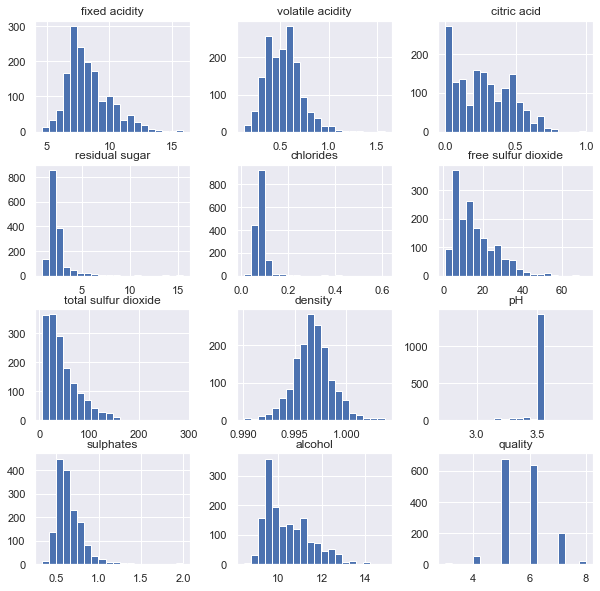

In [13]:

#plot histogram
new_data.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

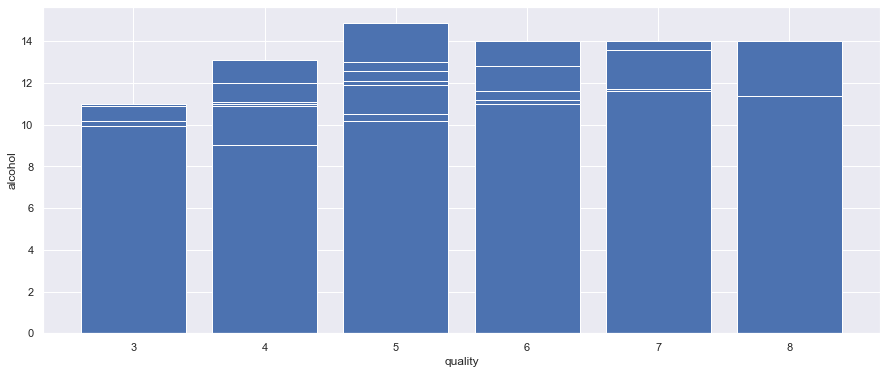

In [14]:

plt.figure(figsize=[15,6])
plt.bar(new_data['quality'],new_data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

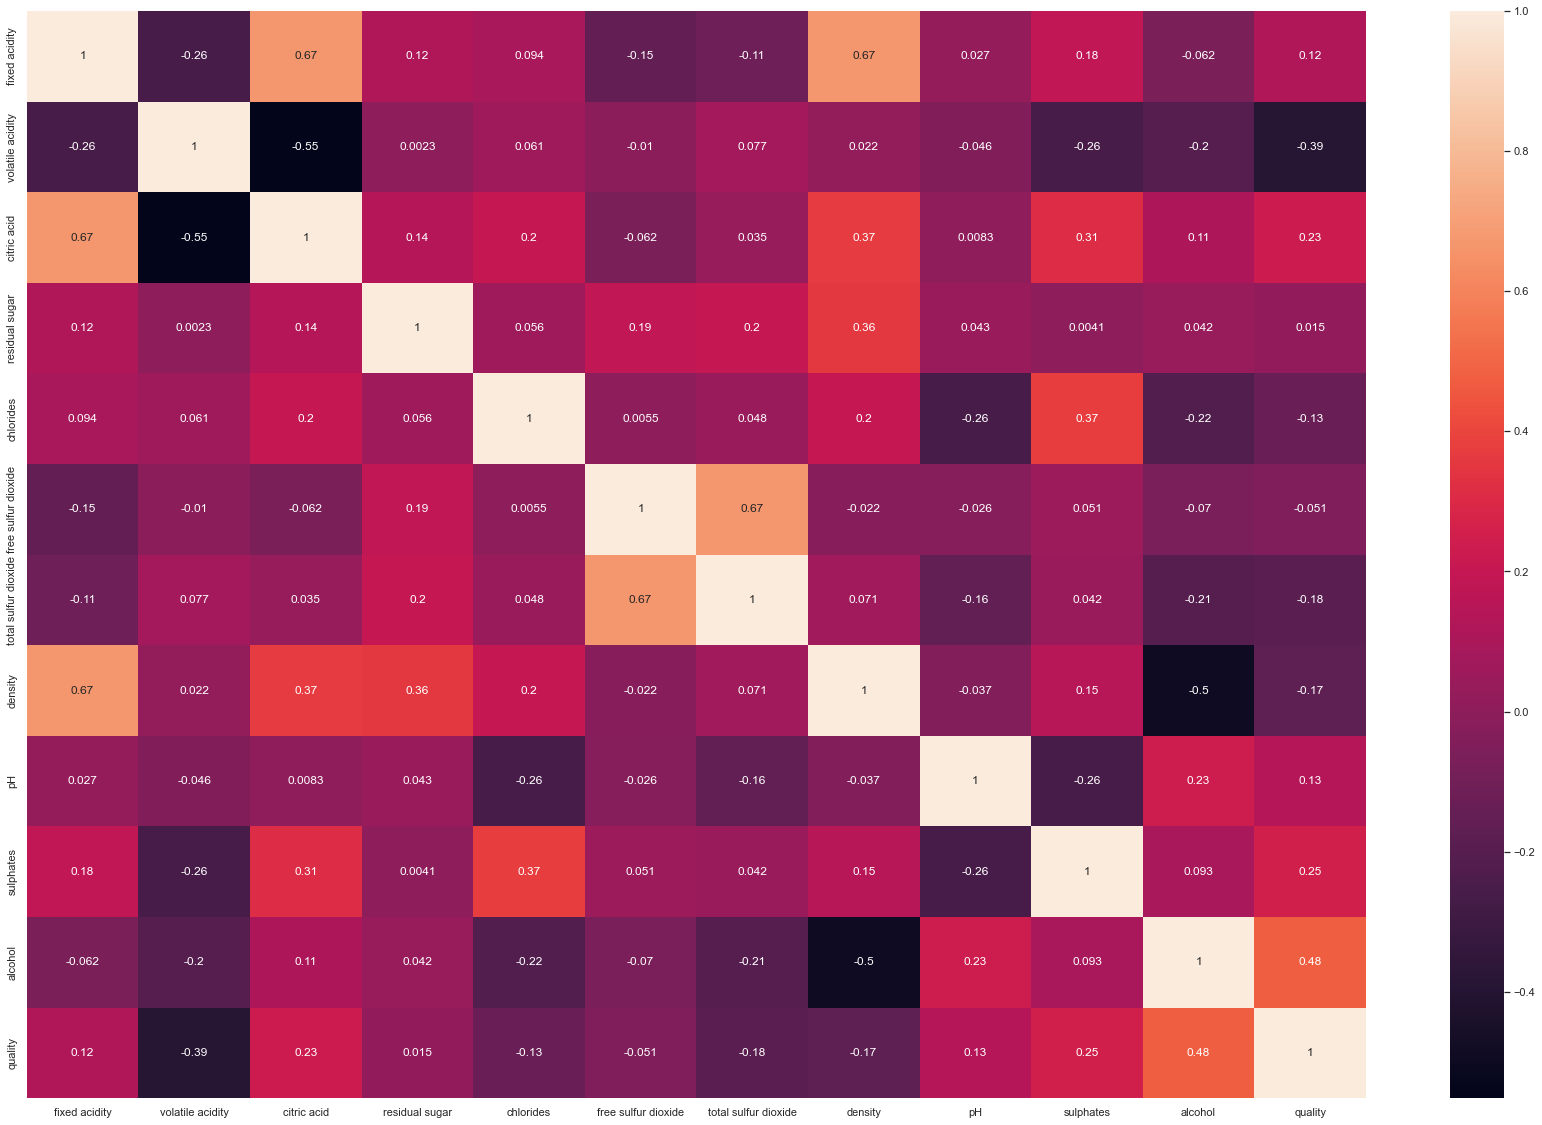

In [15]:
plt.figure(figsize=(30,20))
corr= new_data.corr()
sns.heatmap(corr, annot=True)
plt.savefig("Correlation Matrix.png")
plt.show()

In [16]:
# Detection of Outliers Using Z score
from scipy import stats
z = np.abs(stats.zscore(new_data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.529042          0.962235     1.391924        0.452402   0.243923   
1          0.299365          1.967274     1.391924        0.044793   0.223247   
2          0.299365          1.297248     1.186571        0.168291   0.095837   
3          1.652891          1.382856     1.483021        0.452402   0.265158   
4          0.529042          0.962235     1.391924        0.452402   0.243923   
...             ...               ...          ...             ...        ...   
1594       1.218073          0.403880     0.981218        0.381374   0.053367   
1595       1.390331          0.124703     0.878541        0.239318   0.541212   
1596       1.160654          0.098639     0.724526        0.168291   0.243923   
1597       1.390331          0.655140     0.775865        0.381374   0.265158   
1598       1.332912          1.215349     1.020976        0.755071   0.435038   

      free sulfur dioxide  

In [17]:
print(np.where(z>3))

(array([   1,    3,   12,   13,   13,   14,   14,   14,   16,   16,   16,
         18,   18,   21,   22,   26,   31,   32,   36,   37,   41,   41,
         42,   44,   45,   46,   49,   52,   53,   55,   56,   60,   78,
         80,   80,   80,   82,   82,   85,   85,   87,   87,   89,   90,
         90,   91,   91,   93,   94,   96,  105,  105,  105,  108,  108,
        109,  110,  111,  113,  114,  117,  119,  120,  123,  124,  125,
        128,  132,  133,  134,  138,  139,  140,  142,  143,  145,  145,
        149,  149,  149,  149,  158,  159,  161,  162,  163,  167,  167,
        167,  177,  178,  179,  179,  196,  223,  223,  237,  240,  241,
        255,  255,  271,  278,  288,  321,  322,  336,  337,  344,  351,
        371,  378,  388,  393,  393,  397,  397,  439,  439,  448,  456,
        464,  477,  477,  491,  512,  514,  541,  551,  551,  552,  552,
        554,  554,  565,  581,  585,  588,  592,  605,  611,  633,  636,
        646,  646,  648,  649,  649,  649,  669,  

In [18]:
raw_data = new_data[(z < 3).all(axis=1)]

In [19]:
raw_data.shape

(1415, 12)

In [20]:
new_data.shape

(1596, 12)

In [21]:
#from sklearn.model_selection import train_test_split 

x = raw_data.drop(columns= 'quality')
y = raw_data['quality']

In [22]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4


In [23]:
y

0       5.0
2       5.0
4       5.0
5       5.0
6       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1415, dtype: float64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
#from sklearn.ensemble import RandomForestClassifier

rf_classificationModel = RandomForestClassifier(n_estimators=100)
rf_classificationModel.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = rf_classificationModel.predict(x_test)
y_pred

array([5., 5., 7., 6., 6., 5., 6., 6., 5., 6., 5., 5., 6., 7., 6., 6., 5.,
       6., 5., 5., 6., 5., 6., 6., 6., 5., 6., 5., 6., 5., 6., 6., 6., 5.,
       7., 7., 5., 5., 6., 5., 5., 5., 7., 6., 5., 5., 6., 6., 5., 5., 6.,
       6., 7., 5., 5., 6., 6., 6., 5., 5., 5., 7., 5., 5., 6., 4., 6., 5.,
       6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 6., 6., 6., 6., 5., 5.,
       6., 6., 5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 6., 7., 6., 5., 7.,
       6., 6., 5., 6., 6., 5., 5., 6., 6., 5., 5., 5., 6., 6., 7., 6., 6.,
       6., 6., 6., 7., 5., 5., 6., 6., 6., 7., 7., 6., 6., 5., 5., 6., 6.,
       6., 5., 5., 5., 5., 6., 6., 5., 6., 7., 5., 6., 6., 5., 5., 6., 5.,
       5., 5., 6., 5., 5., 6., 5., 5., 5., 7., 5., 5., 5., 7., 5., 6., 6.,
       6., 5., 5., 6., 5., 5., 5., 5., 5., 7., 5., 5., 6., 6., 5., 5., 5.,
       5., 5., 5., 5., 6., 6., 6., 6., 7., 5., 6., 6., 6., 5., 5., 5., 5.,
       5., 5., 7., 7., 6., 6., 6., 7., 5., 6., 5., 5., 6., 6., 6., 7., 6.,
       5., 6., 5., 5., 6.

In [27]:
# Data Evaluation

#from sklearn import metrics
print('Accuracy Score', metrics.accuracy_score(y_pred, y_test))

Accuracy Score 0.696113074204947


<Figure size 1440x1440 with 0 Axes>

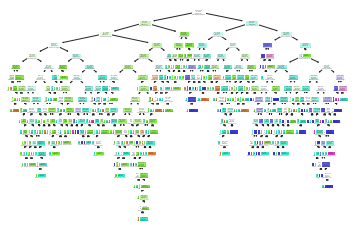

<Figure size 1440x1440 with 0 Axes>

In [28]:
# Hyperparameter Tuning:

from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled=True)

plt.figure(figsize=(20,20))

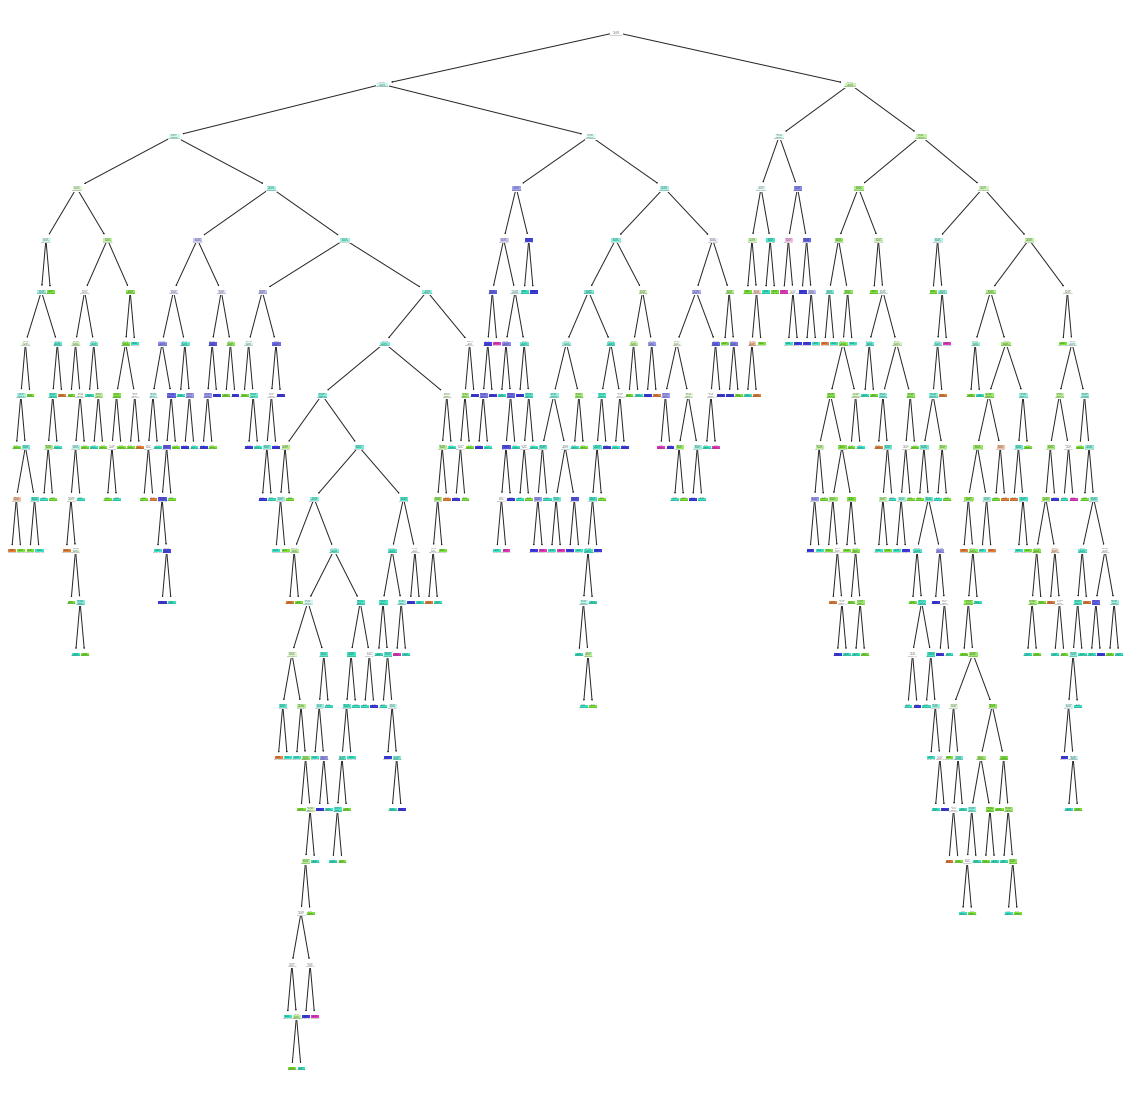

In [29]:
plt.figure(figsize=(20,20))
for i in range(len(rf_classificationModel.estimators_)):
               tree.plot_tree(rf_classificationModel.estimators_[i], filled=True)